In [ ]:
#Danielle 
#this is a modification of Baban's code. I use a different CNN for the code. I also make a few changes to code in a few places
#use GPU if you can

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

Mounted at /content/gdrive


In [2]:
data_dir = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset'

traindir = data_dir + '/Train/'
validdir = data_dir + '/Validation/'
testdir = data_dir + '/Test/'

print(os.listdir(data_dir))
classes = os.listdir(traindir)
print(classes)

['metadata.json', 'Danielle ', 'Train', 'Validation', 'Test', 'Images']
['With UPC ', 'Without UPC ']


In [3]:
with_upc_files = os.listdir(data_dir + "/Train/With UPC ")
print('No. of training examples with UPC in them:', len(with_upc_files))
print(with_upc_files[:5])

No. of training examples with UPC in them: 230
['gsv_4.jpg', 'gsv_5.jpg', 'gsv_30.jpg', 'gsv_29.jpg', 'gsv_31.jpg']


In [4]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision import transforms

In [32]:
TRANSFORM_temp = transforms.Compose([
        #transforms.RandomResizedCrop(size=640, scale=(0.8, 1.0)),
        # transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(contrast=(2.5,2.5), saturation=(10,10), hue=(0.5,0.5)),    #consider less dramatic? or just do the boxing and this is less critical. removing it does little
        # transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=600),  # Cropped out the google logo 
        transforms.ToTensor(),
        transforms.Normalize(mean=[0,0,0], std=[1,1,1]),
        transforms.Resize(128)  # normal distribution
    ])

In [33]:
dataset = ImageFolder(traindir, transform=TRANSFORM_temp)
train_ds = dataset
val_ds = ImageFolder(validdir, transform=TRANSFORM_temp)

In [34]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 128, 128]) 0


tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.5212, 0.4791, 0.4588,  ..., 0.7225, 0.6613, 0.6319],
         [0.7628, 0.4972, 0.3371,  ..., 0.7514, 0.6152, 0.5958],
         [0.9157, 0.5434, 0.6541,  ..., 0.6385, 0.7077, 0.7522]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8775, 0.8431, 0.7882],
         [1.0000, 1.0000, 1.0000,  ..., 0.8775, 0.8431, 0.7882],
         [1.0000, 1.0000, 1.0000,  ..., 0.8699, 0.8431, 0.7882],
         ...,
         [0.8005, 0.9605, 0.9839,  ..., 0.7891, 0.7226, 0.7164],
         [0.9700, 0.9687, 0.9414,  ..., 0.8292, 0.7035, 0.6024],
         [0.9746, 0.9632, 0.9820,  ..., 0.7058, 0.7134, 0.7522]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [35]:
print(dataset.classes)

['With UPC ', 'Without UPC ']


torch.Size([3, 128, 128])
Label:  With UPC  (0)


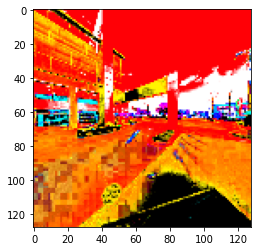

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print(img.shape)
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

show_example(*dataset[24])

In [37]:
from torch.utils.data.dataloader import DataLoader

batch_size=5

In [38]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [39]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


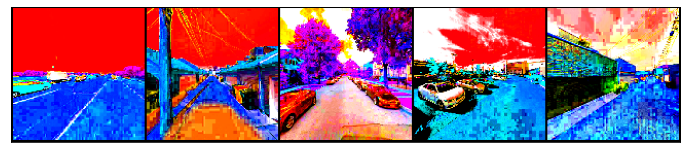

In [40]:
show_batch(train_dl)

Using a Pretrained model

In [41]:
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
# PyTorch
import torchvision
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [42]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        #prec = pr(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()} #, "prec": prec.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [43]:
class Model2(ImageClassificationBase):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 256)
        self.linear4 = nn.Linear(256, 32)
        self.linear5 = nn.Linear(32, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

In [44]:
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [45]:
#input_size = 32*32*3    
#output_size = 22
#model = Model2()
#model

In [46]:
import torch

In [47]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [48]:
device = get_default_device()
device

device(type='cuda')

In [49]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(Model2(128*128*3, 22), device);

In [50]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):   #try others, Adam, RMSprop
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [51]:
model = to_device(Model2(128*128*3, 22), device)

In [52]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))  #guess=truth

#def pr(outputs, labels):
 #   _, preds = torch.max(outputs, dim=1)    #TP / (FP + TP)    #how to make this work??
 #   for i in range(labels ==1):
 #     return torch.tensor(torch.sum(preds[i] == labels).item() / len(preds==1))

In [53]:
#evaluate(model, val_dl)

In [54]:
%%time 
num_epochs = 5
# opt_func = torch.optim.Adam
lr = 0.01

#history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)
history = [evaluate(model, val_dl)]
history += fit(10, 0.00001, model, train_dl, val_dl)    #try a more complex model due to underfitting. overfit issue too

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.2275, val_loss: 0.6582, val_acc: 0.7500
Epoch [1], train_loss: 0.6565, val_loss: 0.5834, val_acc: 0.7500
Epoch [2], train_loss: 0.6133, val_loss: 0.5662, val_acc: 0.7500
Epoch [3], train_loss: 0.5936, val_loss: 0.5579, val_acc: 0.7500
Epoch [4], train_loss: 0.5741, val_loss: 0.5854, val_acc: 0.7200
Epoch [5], train_loss: 0.5458, val_loss: 0.5508, val_acc: 0.7600
Epoch [6], train_loss: 0.5395, val_loss: 0.5713, val_acc: 0.7300
Epoch [7], train_loss: 0.5332, val_loss: 0.5296, val_acc: 0.7400
Epoch [8], train_loss: 0.5220, val_loss: 0.5394, val_acc: 0.7500
Epoch [9], train_loss: 0.4874, val_loss: 0.5201, val_acc: 0.7600
CPU times: user 9.87 s, sys: 3.57 s, total: 13.4 s
Wall time: 7min 45s


In [55]:
def plot_accuracies(history):
     accuracies = [x['val_acc'] for x in history]
     plt.plot(accuracies, '-x')
     plt.xlabel('epoch')
     plt.ylabel('accuracy')
     plt.title('Accuracy vs. No. of epochs');

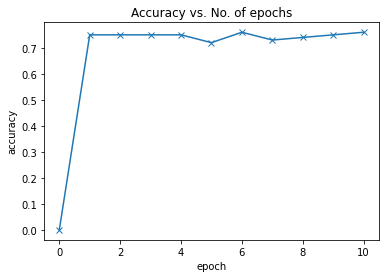

In [56]:
plot_accuracies(history)

In [57]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

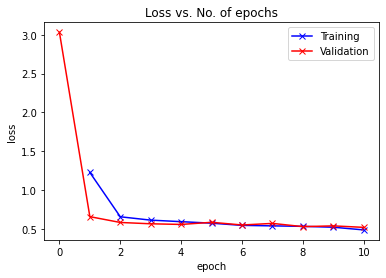

In [58]:
plot_losses(history)

In [59]:
test_dataset = ImageFolder(data_dir+'/Test', transform=TRANSFORM_temp)

In [60]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: With UPC  , Predicted: Without UPC 


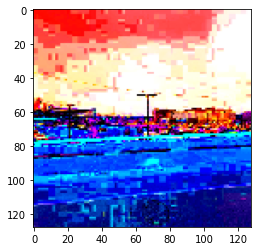

In [61]:
img, label = test_dataset[20]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Without UPC  , Predicted: Without UPC 


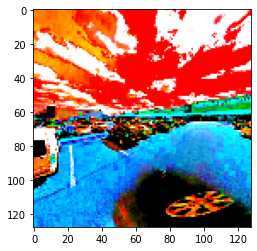

In [62]:
img, label = test_dataset[26]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [63]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [64]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(dataset.classes[label], predict_image(img, model))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

ValueError: ignored